# <a>Fase 3<a>
    * Aplicar técnica de clustering para identificar segmentos clave en los que la marca Vanish tiene presencia, y poder       identificar áreas en las que mejorar su estrategia.

In [24]:
# importamos las librerías a Usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [5]:
reckitt_df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/PROYECTO RECKITT/ReckittMex.csv')
reckitt_df.head()

,MANUFACTURER,BRAND,ITEM_CODE,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3,SEGMENT,CATEGORY_DESCRIPTION,WEEK,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR,MONTH,WEEK_NUMBER,DATE
0,INDS. ALEN,CLORALEX,75000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,45-22,0.034,0.142,8.500,TOTAL AUTOS SCANNING MEXICO,2022,11,45,13/11/2022
1,INDS. ALEN,CLORALEX,75000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,48-22,0.002,0.009,1.000,TOTAL AUTOS SCANNING MEXICO,2022,12,48,04/12/2022
2,INDS. ALEN,CLORALEX,75000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,mar-22,0.432,1.956,14.400,TOTAL AUTOS SCANNING MEXICO,2022,1,3,23/01/2022
3,INDS. ALEN,CLORALEX,75000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,may-22,0.233,0.779,11.095,TOTAL AUTOS SCANNING MEXICO,2022,2,5,06/02/2022
4,INDS. ALEN,CLORALEX,75000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,3,LIQUIDO,CLORO,CLORO,NO DEFINIDO,BLEACH,LAVAVAJILLAS,sep-22,0.055,0.251,5.500,TOTAL AUTOS SCANNING MEXICO,2022,3,9,06/03/2022


In [8]:
# Asegurarnos de que DATE esté en formato de fecha
reckitt_df['DATE'] = pd.to_datetime(reckitt_df['DATE'], errors='coerce')

### Seleccionar las características para el clustering
Vamos a utilizar las siguientes columnas relevantes para segmentar los datos:

TOTAL_UNIT_SALES: Ventas totales.                                                                                              
TOTAL_VALUE_SALES: Valor total de las ventas.                                                                                
REGION: Región geográfica.                                                                                                     
CATEGORY: Categoria.                                                                                        

In [15]:
# Convertiremos REGION a valores numéricos usando codificación.
from sklearn.preprocessing import LabelEncoder

# Codificar 'REGION' a valores numéricos
encoder = LabelEncoder()
reckitt_df['REGION_ENCODE'] = encoder.fit_transform(reckitt_df['REGION'])

# Seleccionar columnas para clustering
features = ['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES','REGION_ENCODE','CATEGORY']
clustering_data = reckitt_df[features]

In [19]:
#  Estandarizar las características, Es crucial escalar los datos para evitar que las diferencias de magnitud 
# afecten los resultados del clustering.
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

## <a>Aplicar el algoritmo K-Means<a/>

In [22]:
# Primero determinaremos el número óptimo de clusters usando el método del codo.

from sklearn.cluster import KMeans

# en una lista vacia guardamos las distancias cuadraticas que se tienen de cada punto a su respectivo grupo o centroide
# wcss = weighted cluster sum of squares

wcss = []
# creamos un for que vaya iterando de 1 hasta 11 clusters
for index in range(1, 11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

### <code>En este caso el numero optimo de clusters es de 3<code/>

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
cluster_values = kmeans.fit_predict(scaled_data)  # entrenamos el algoritmo
print(cluster_values)

[0 0 0 ... 0 1 0]


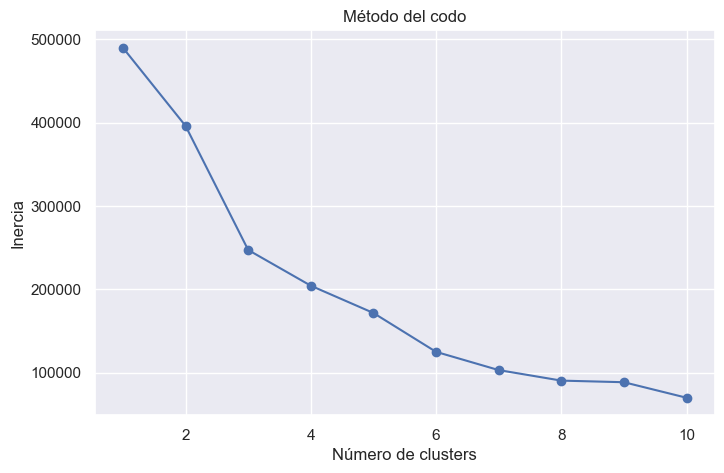

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método del codo
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# Elegir el número óptimo de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
reckitt_df['CLUSTER'] = kmeans.fit_predict(scaled_data)


In [54]:
# Resumen de los clusters
cluster_summary = reckitt_df.groupby('CLUSTER')[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES']].mean()
print(cluster_summary)


         TOTAL_UNIT_SALES  TOTAL_VALUE_SALES
CLUSTER                                     
0                3.217315          94.558791
1                1.869262          52.269751
2              237.563261        5799.323481


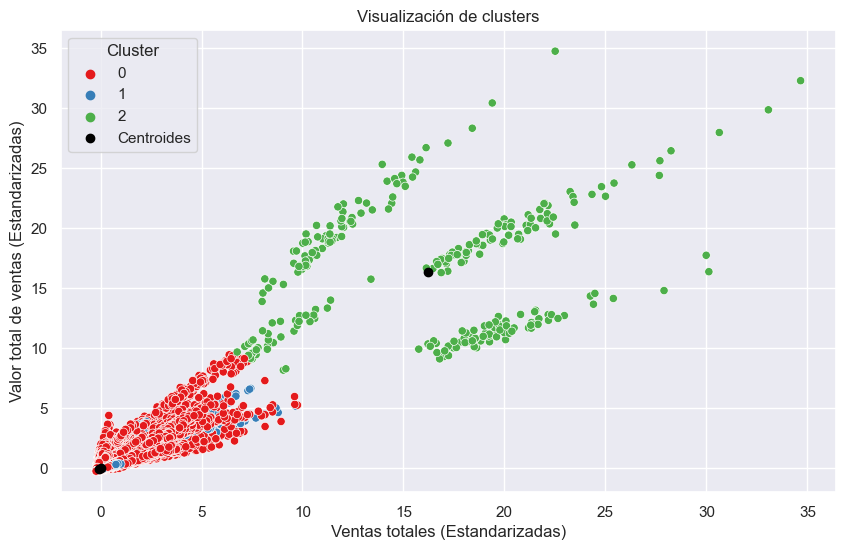

In [55]:
import seaborn as sns

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_data[:, 0], y=scaled_data[:, 1],
    hue=reckitt_df['CLUSTER'], palette='Set1'
)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')
plt.title('Visualización de clusters')
plt.xlabel('Ventas totales (Estandarizadas)')
plt.ylabel('Valor total de ventas (Estandarizadas)')
plt.legend(title='Cluster')
plt.show()


In [56]:
# Identificar patrones por cluster
for cluster_id, group in reckitt_df.groupby('CLUSTER'):
    print(f"Cluster {cluster_id}")
    print(group['REGION'].value_counts())
    print(group[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES']].describe())

Cluster 0
TOTAL AUTOS SCANNING MEXICO    20992
TOTAL AUTOS AREA 4             17202
TOTAL AUTOS AREA 6             16949
TOTAL AUTOS AREA 5             16145
TOTAL AUTOS AREA 3                26
TOTAL AUTOS AREA 2                 1
Name: REGION, dtype: int64
       TOTAL_UNIT_SALES  TOTAL_VALUE_SALES
count      71315.000000       71315.000000
mean           3.217315          94.558791
std            9.170793         226.223603
min            0.000000           0.001000
25%            0.076000           3.103000
50%            0.433000          19.239000
75%            1.978000          78.708000
max          144.265000        3389.973000
Cluster 1
TOTAL AUTOS AREA 2    18536
TOTAL AUTOS AREA 3    16472
TOTAL AUTOS AREA 1    15897
Name: REGION, dtype: int64
       TOTAL_UNIT_SALES  TOTAL_VALUE_SALES
count      50905.000000       50905.000000
mean           1.869262          52.269751
std            6.534948         147.081038
min            0.000000           0.001000
25%            0.0

In [58]:
reckitt_df.to_csv('reckitt_KMeans.csv', index = False)

## <a>Insights y posibles acciones:<a/>
Cluster 0 y 1:

Representan ventas bajas. Puede ser necesario revisar estrategias de marketing o distribución para aumentar la participación en estas áreas.
Identificar qué productos o promociones tienen mejor desempeño en "TOTAL AUTOS SCANNING MEXICO" y replicarlas en otras áreas.   
                                                                                                                               
Cluster 2:

Refleja una región o segmento altamente productivo.
Es recomendable profundizar en los factores que contribuyen a estas altas ventas (productos, promociones, clientes clave) y aplicarlos a otras áreas.